In [1]:
import numpy as np
import pandas as pd

# 1. Import and preview data

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(f'Training data has {train_data.shape[0]} rows and {train_data.shape[1]} columns.')
print('These columns are of type:\n', train_data.dtypes)

Training data has 891 rows and 12 columns.
These columns are of type:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [5]:
print("There are ", len(train_data.Name.str.rsplit(",", n=1, expand=True)[0].value_counts()), " unique last names.")
print("There are ", len(train_data.SibSp.value_counts()), " unique values of number of Siblings / Spouses.")
print("There are ", len(train_data.Parch.value_counts()), " unique values of number of Parents / Children.")
print("There are ", len(train_data.Ticket.value_counts()), " unique Tickets numbers.")
print("There are ", len(train_data.Cabin.value_counts()), " unique Cabin values.")
print("There are ", len(train_data.Embarked.value_counts()), " unique Embarked values.")

There are  667  unique last names.
There are  7  unique values of number of Siblings / Spouses.
There are  7  unique values of number of Parents / Children.
There are  681  unique Tickets numbers.
There are  147  unique Cabin values.
There are  3  unique Embarked values.


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Initial thoughts and findings about columns:
1. `PassengerId` - **drop**
2. `Survived` - dependent variable
3. `Pclass` - 3 categories, get dummies
4. `Name` - categorical, 667 different names, probably there are other columns to take relatives into account, therefore rather **drop**
5. `Sex` - 2 categories, get dummies
6. `Age` - numerical variable, 177 null values, thus - fill NAs with mean / median / some number or remove
7. `SibSp` - 7 unique values, **what to do? further analysis**
8. `Parch` - 7 unique values, **what to do? further analysis**
9. `Ticket` - 681 unique values, **what to do? Remove?**
10. `Fare` - ticket price, continuous variable
11. `Cabin` - cabin number, 687 null values, thus - fill NAs with an arbitrary value or remove
12. `Embarked` - port of embarkation, 3 categories, 2 null values - fill NAs and get dummies
---

# 2. Visualise and analyse data

But before making the final decision about variables let's conduct a deeper analysis.

`Survived` - dependent variable

`Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare` - check relations

`Ticket`, `Cabin`, `Embarked` - explore more, maybe with some editing of the variables

In [8]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 2.1. `Pclass`, `Sex`, `Age`, `SibSp`, `Parch`, `Fare`

<Axes: xlabel='Fare', ylabel='Survived'>

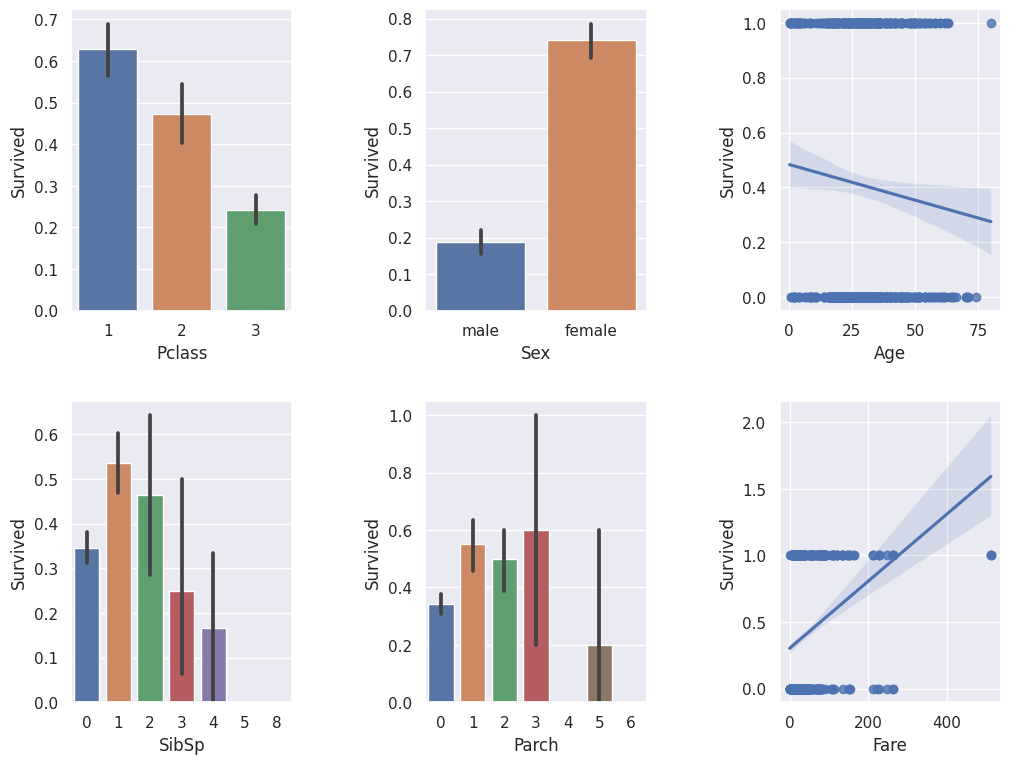

In [9]:
sns.set_theme()
fig, axes = plt.subplots(2, 3, figsize=(12, 9))
plt.subplots_adjust(hspace = 0.3, wspace = 0.6)

sns.barplot(data=train_data, x='Pclass', y='Survived', ax=axes[0,0])
sns.barplot(data=train_data, x='Sex', y='Survived', ax=axes[0,1])
sns.regplot(data=train_data, x='Age', y='Survived', ax=axes[0,2])
sns.barplot(data=train_data, x='SibSp', y='Survived', ax=axes[1,0])
sns.barplot(data=train_data, x='Parch', y='Survived', ax=axes[1,1])
sns.regplot(data=train_data, x='Fare', y='Survived', ax=axes[1,2])

<Axes: xlabel='Pclass', ylabel='count'>

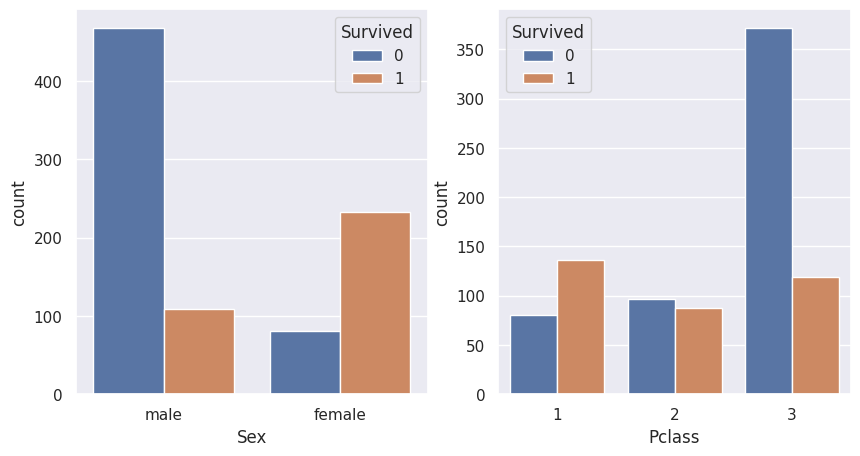

In [10]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(data=train_data, x='Sex', hue='Survived', ax=axes[0])
sns.countplot(data=train_data, x='Pclass', hue='Survived', ax=axes[1])

On the plots we can observe that: 
- `Pclass` - the higher the ticket class (so smaller number), the higher chance of survival,
- `Sex` - significantly higher chance of survival amongst women,
- `Age` - based on the regression line one can expect that the younger the person, the higher chance of survival, but a **further analysis is needed**,
-`SibSp` and `Parch` - values 1, 2 and 3 seem to have a higher chance of survival,
- `Fare` - based on the regression line, one can expect that the more expensive the ticket was, the higher the chance of survival

## 2.1.1. Age

<Axes: xlabel='Age', ylabel='Proportion'>

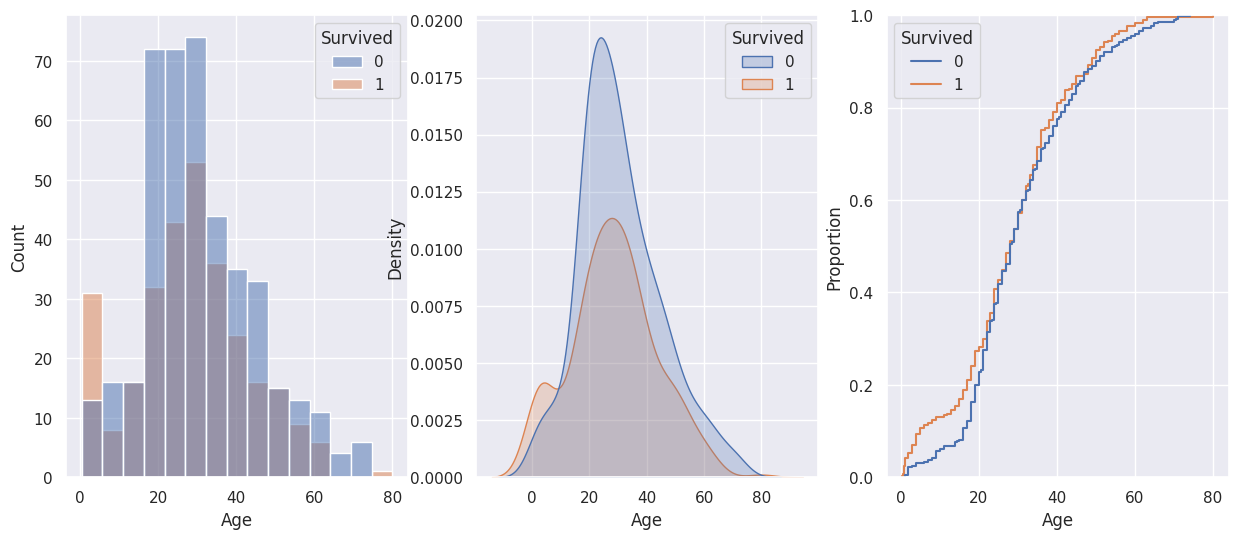

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.histplot(data=train_data, x="Age", hue="Survived", bins=15, ax=axes[0])
sns.kdeplot(data=train_data, x='Age', hue="Survived", fill=True, ax=axes[1])
sns.ecdfplot(data=train_data, x='Age', hue="Survived", ax=axes[2])

In [12]:
# Analyse 'Age' variable

# Create copy of the train_data
train_data_2 = train_data.copy()

age_bins = np.array([0, 1, 2, 3, 4, 5, 10, 15, 20, 30, 40 ,50 ,60 ,70, 81])
# age_bins = np.array([0, 1, 5, 10, 20, 30, 60, 70, 81]) 

# Bin the data
train_data_2['AgeGroup'] = pd.cut(train_data_2['Age'], bins=age_bins, right=False)

In [13]:
# Compute % of survivors / not_survivors in each Age Group
age_group_stats = train_data_2.groupby(['AgeGroup', 'Survived']).size().unstack(fill_value=0)
age_group_stats['Total'] = age_group_stats.sum(axis=1)
age_group_stats['Not_Survived_Percentage'] = (age_group_stats[0] / age_group_stats['Total']) * 100
age_group_stats['Survived_Percentage'] = (age_group_stats[1] / age_group_stats['Total']) * 100

In [14]:
# Compute % of survivors / not_survivors among all passengers with Age value
train_data_3 = train_data[~train_data['Age'].isna()].copy()
print(train_data_3["Survived"].value_counts()[0])
print(train_data_3["Survived"].value_counts()[1])
tot = train_data_3["Survived"].value_counts()[0] + train_data_3["Survived"].value_counts()[1]
print("Percentage of passengers that did not survive: ", round(train_data_3["Survived"].value_counts()[0]/tot*100, 3))
print("Percentage of passengers that survived: ", round(train_data_3["Survived"].value_counts()[1]/tot*100, 3))

424
290
Percentage of passengers that did not survive:  59.384
Percentage of passengers that survived:  40.616


In [15]:
df = pd.DataFrame(data={'AgeGroup': ['Total'],
                        0: [train_data_3["Survived"].value_counts()[0]],
                        1: [train_data_3["Survived"].value_counts()[1]], 
                        'Total': [tot], 
                        'Not_Survived_Percentage': [train_data_3["Survived"].value_counts()[0]/tot*100], 
                        'Survived_Percentage': [train_data_3["Survived"].value_counts()[1]/tot*100]
                       })
df = df.set_index('AgeGroup')
age_group_stats = pd.concat([age_group_stats, df])

In [16]:
age_group_stats

,0,1,Total,Not_Survived_Percentage,Survived_Percentage
AgeGroup,,,,,
"[0, 1)",0,7,7,0.000000,100.000000
"[1, 2)",2,5,7,28.571429,71.428571
"[2, 3)",7,3,10,70.000000,30.000000
"[3, 4)",1,5,6,16.666667,83.333333
"[4, 5)",3,7,10,30.000000,70.000000
"[5, 10)",11,11,22,50.000000,50.000000
"[10, 15)",9,7,16,56.250000,43.750000
"[15, 20)",52,34,86,60.465116,39.534884
"[20, 30)",143,77,220,65.000000,35.000000


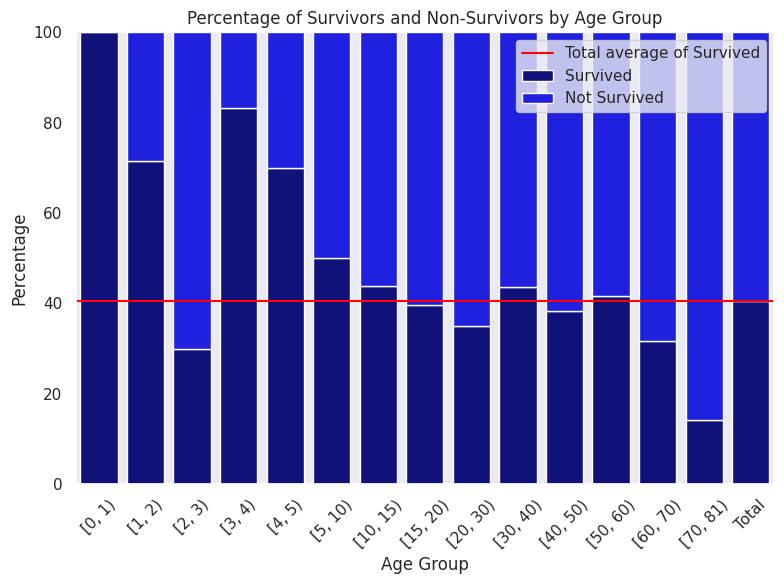

In [17]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=age_group_stats.index, y=age_group_stats['Survived_Percentage'], color='darkblue', label='Survived')
sns.barplot(x=age_group_stats.index, y=age_group_stats['Not_Survived_Percentage'], bottom=age_group_stats['Survived_Percentage'], color='blue', label='Not Survived')

ax.axhline(y=age_group_stats.loc['Total', 'Survived_Percentage'], color='red', linestyle='-', label='Total average of Survived')

# Customize the plot
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.title('Percentage of Survivors and Non-Survivors by Age Group')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Based on those results and experiments with other choices of age_bins, I decided to select `Age` bins: [0, 1, 5, 10, 20, 30, 60, 70, 81]. First, I will fill NA values with 19 as group [10-20) is closest to total average.

In [18]:
train_data['Age'] = train_data['Age'].fillna(19)

age_bins = np.array([0, 1, 5, 10, 20, 30, 60, 70, 81])

# Bin the data
train_data['AgeGroup'] = 'Age ' + pd.cut(train_data['Age'], bins=age_bins, right=False).astype('string')

## 2.1.2. SibSp and Parch

In [19]:
# Create new variable 'Relatives'

train_data['Relatives'] = train_data['SibSp'] + train_data['Parch']

In [20]:
train_data['Relatives'].value_counts()

Relatives
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

<Axes: xlabel='Relatives', ylabel='count'>

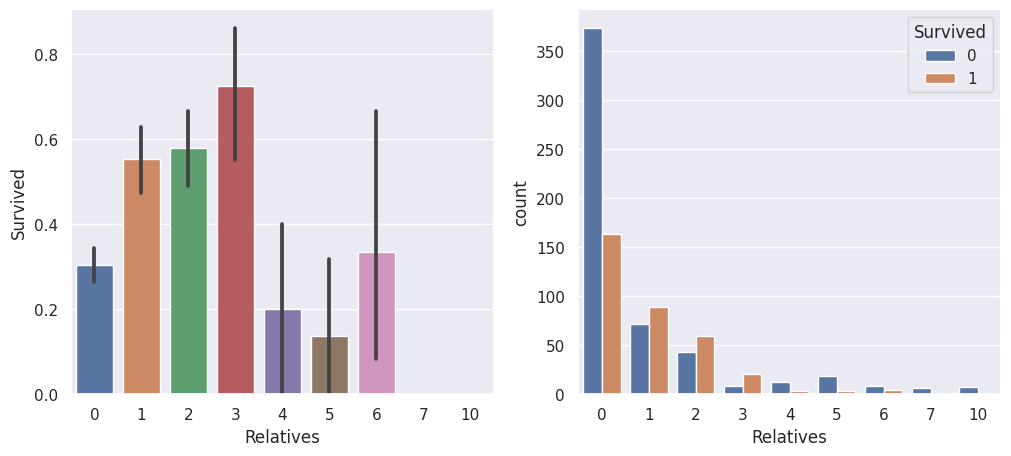

In [21]:
sns.set_theme()
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(data=train_data, x='Relatives', y='Survived', ax=axes[0])
sns.countplot(data=train_data, x='Relatives', hue='Survived', ax=axes[1])

### From the graphs we can observe that alone passengers and passengers with many relatives on board had lower chance of survival than passengers with 1-3 relatives.

In [22]:
(test_data['SibSp'] + test_data['Parch']).max()

10

### The highest number of relatives for test_data is also 10.

In [23]:
relatives_bins = np.array([0, 1, 4, 11])

# Bin the data
train_data['RelativesGroup'] = 'Relatives ' + pd.cut(train_data['Relatives'], bins=relatives_bins, right=False).astype('string')

## 2.1.3. Fare

In [24]:
# Analyse 'Fare' variable

# Create copy of the train_data
train_data_2 = train_data.copy()

fare_bins = np.array([0, 7, 10, 15, 20, 30, 40 ,50 , 60, 70, 80, 90, 100 ,200, 400, 600])

# Bin the data
train_data_2['FareGroup'] = pd.cut(train_data_2['Fare'], bins=fare_bins, right=False)

In [25]:
# Compute % of survivors / not_survivors in each Age Group
fare_group_stats = train_data_2.groupby(['FareGroup', 'Survived']).size().unstack(fill_value=0)
fare_group_stats['Total'] = fare_group_stats.sum(axis=1)
fare_group_stats['Not_Survived_Percentage'] = (fare_group_stats[0] / fare_group_stats['Total']) * 100
fare_group_stats['Survived_Percentage'] = (fare_group_stats[1] / fare_group_stats['Total']) * 100

In [26]:
# Compute % of survivors / not_survivors among all passengers
print(train_data["Survived"].value_counts()[0])
print(train_data["Survived"].value_counts()[1])
tot = train_data["Survived"].value_counts()[0] + train_data["Survived"].value_counts()[1]
print("Percentage of passengers that did not survive: ", round(train_data["Survived"].value_counts()[0]/tot*100, 3))
print("Percentage of passengers that survived: ", round(train_data["Survived"].value_counts()[1]/tot*100, 3))

549
342
Percentage of passengers that did not survive:  61.616
Percentage of passengers that survived:  38.384


In [27]:
fare_group_stats

Survived,0,1,Total,Not_Survived_Percentage,Survived_Percentage
FareGroup,,,,,
"[0, 7)",26,2,28,92.857143,7.142857
"[7, 10)",243,65,308,78.896104,21.103896
"[10, 15)",74,47,121,61.157025,38.842975
"[15, 20)",29,29,58,50.000000,50.000000
"[20, 30)",78,58,136,57.352941,42.647059
"[30, 40)",36,28,64,56.250000,43.750000
"[40, 50)",11,4,15,73.333333,26.666667
"[50, 60)",12,27,39,30.769231,69.230769
"[60, 70)",11,6,17,64.705882,35.294118


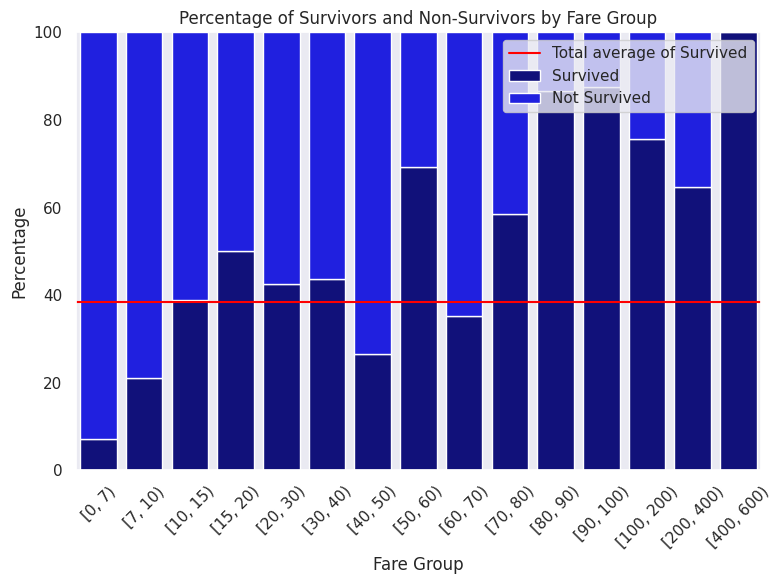

In [28]:
sns.set(style="dark")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=fare_group_stats.index, y=fare_group_stats['Survived_Percentage'], color='darkblue', label='Survived')
sns.barplot(x=fare_group_stats.index, y=fare_group_stats['Not_Survived_Percentage'], bottom=fare_group_stats['Survived_Percentage'], color='blue', label='Not Survived')

ax.axhline(y=38.384, color='red', linestyle='-', label='Total average of Survived')

# Customize the plot
plt.xlabel('Fare Group')
plt.ylabel('Percentage')
plt.title('Percentage of Survivors and Non-Survivors by Fare Group')
plt.legend(loc='upper right')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Question: Should I treat it as a continuous variable or to make a categorical variable using buckets ([0, 7, 10, 50, 80, 100, 400, 600])?

#### Answer: Relation is roughly linear here - the more expensive the ticket, the higher chance of survival. Therefore, a continuous variable should be sufficient.

### However, `Fare` variable can be highly correlated with `Pclass` variable

In [29]:
print("The average price of first class ticket was: ", train_data[train_data['Pclass'] == 1]['Fare'].mean())
print("The average price of second class ticket was: ", train_data[train_data['Pclass'] == 2]['Fare'].mean())
print("The average price of third class ticket was: ", train_data[train_data['Pclass'] == 3]['Fare'].mean())

The average price of first class ticket was:  84.1546875
The average price of second class ticket was:  20.662183152173913
The average price of third class ticket was:  13.675550101832993


---

# 2.2 **Ticket, Cabin and Embarked**

Ticket and Cabin variables will be ecluded.

## 2.2.1. Embarked

<Axes: xlabel='Embarked', ylabel='Fare'>

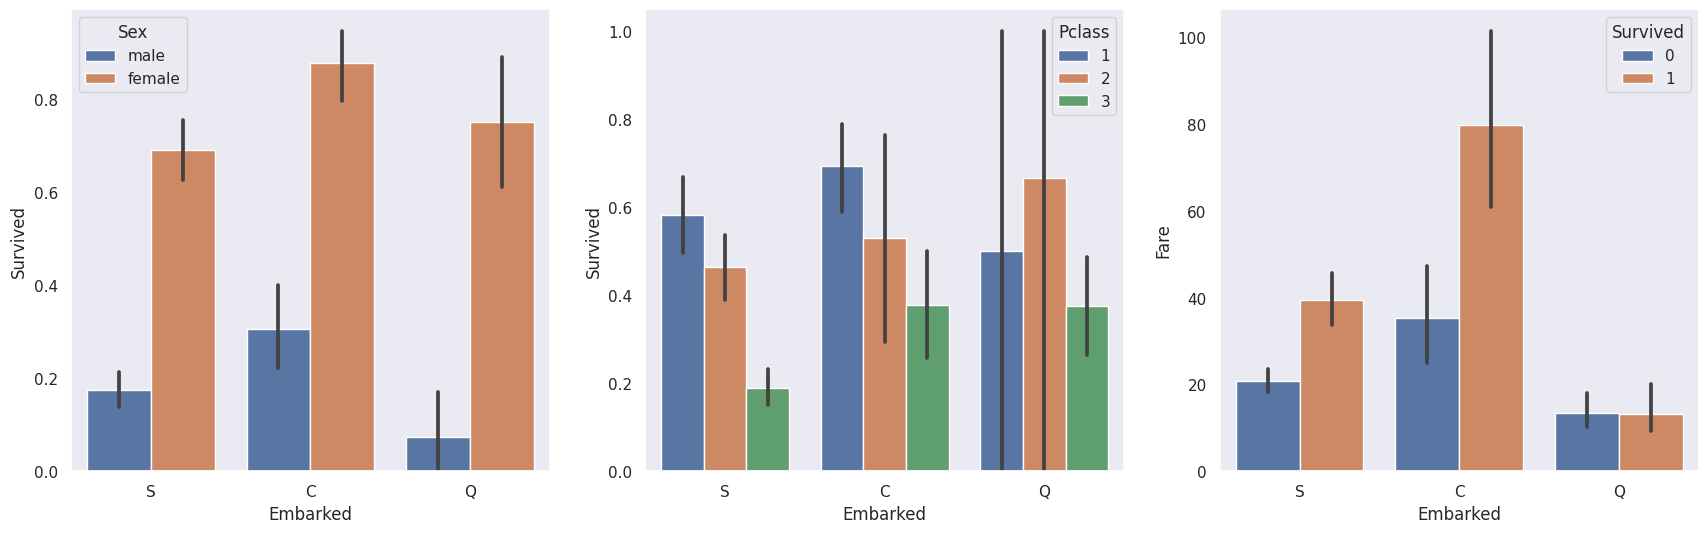

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(21, 6))
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Sex', ax=axes[0])
sns.barplot(data=train_data, x='Embarked', y='Survived', hue='Pclass', ax=axes[1])
sns.barplot(data=train_data, x='Embarked', y='Fare', hue='Survived', ax=axes[2])

On those graphs we can observe that passengers embarked at port C had higher chance of survival.
- From the first plot, we can say that it was independent from the gender of the passenger.
- However, plot 2 and 3 especially can suggest that this relation may be correlated with the fact that those passengers paid more for the tickets, what was previously shown as an important factor for the chance of survival.

In [31]:
print("The average price of ticket for passengers embarked in C was: ", train_data[train_data['Embarked'] == 'C']['Fare'].mean())
print("The average price of ticket for passengers embarked in S was: ", train_data[train_data['Embarked'] == 'S']['Fare'].mean())
print("The average price of ticket for passengers embarked in Q was: ", train_data[train_data['Embarked'] == 'Q']['Fare'].mean())

The average price of ticket for passengers embarked in C was:  59.95414404761905
The average price of ticket for passengers embarked in S was:  27.079811801242233
The average price of ticket for passengers embarked in Q was:  13.276029870129872


In [32]:
train_data['Embarked'].isna().sum()

2

In [33]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

# 3. Select variables

In [34]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Relatives,RelativesGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"Age [20, 30)",1,"Relatives [1, 4)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"Age [30, 60)",1,"Relatives [1, 4)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"Age [20, 30)",0,"Relatives [0, 1)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"Age [30, 60)",1,"Relatives [1, 4)"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"Age [30, 60)",0,"Relatives [0, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"Age [20, 30)",0,"Relatives [0, 1)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"Age [10, 20)",0,"Relatives [0, 1)"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,NaN,S,"Age [10, 20)",3,"Relatives [1, 4)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"Age [20, 30)",0,"Relatives [0, 1)"


## 3.1. Get dummies for `Sex`, `Embarked`, `AgeGroup` and `RelativesGroup`
### To use OneHotEncoder variables must be of type 'category'

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        891 non-null    object 
 12  AgeGroup        891 non-null    string 
 13  Relatives       891 non-null    int64  
 14  RelativesGroup  891 non-null    string 
dtypes: float64(2), int64(6), object(5), string(2)
memory usage: 104.5+ KB


In [36]:
train_data['Sex'] = train_data['Sex'].astype('category')
train_data['Embarked'] = train_data['Embarked'].astype('category')
train_data['AgeGroup'] = train_data['AgeGroup'].astype('category')
train_data['RelativesGroup'] = train_data['RelativesGroup'].astype('category')

In [37]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

encoded_data = ohe.fit_transform(train_data[['Sex', 'Embarked', 'AgeGroup', 'RelativesGroup']]).toarray()
labels = ohe.categories_
labels = np.concatenate((labels[0], labels[1], labels[2], labels[3]), axis=0)

encoded_df = pd.DataFrame(encoded_data, columns=labels)

In [38]:
train_data = pd.concat([train_data, encoded_df], axis=1)

### For Logistic Regression

In [39]:
train_data_reg = train_data.copy()
train_data_reg = train_data_reg.drop(columns=['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked',
                                              'AgeGroup', 'Relatives', 'RelativesGroup', 'male', 'S', 'Age [70, 81)', 'Relatives [4, 11)'])

In [40]:
train_data_reg

,Survived,Pclass,Fare,female,C,Q,"Age [0, 1)","Age [1, 5)","Age [10, 20)","Age [20, 30)","Age [30, 60)","Age [5, 10)","Age [60, 70)","Relatives [0, 1)","Relatives [1, 4)"
0,0,3,7.2500,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,71.2833,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1,3,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,53.1000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0,3,8.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
887,1,1,30.0000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
888,0,3,23.4500,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
889,1,1,30.0000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### For decision trees

In [41]:
train_data_tree = train_data.copy()
train_data_tree = train_data_tree.drop(columns=['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
                                                'Cabin', 'Embarked', 'AgeGroup', 'Relatives', 'RelativesGroup'])

In [42]:
train_data_tree

,Survived,Pclass,Fare,female,male,C,Q,S,"Age [0, 1)","Age [1, 5)","Age [10, 20)","Age [20, 30)","Age [30, 60)","Age [5, 10)","Age [60, 70)","Age [70, 81)","Relatives [0, 1)","Relatives [1, 4)","Relatives [4, 11)"
0,0,3,7.2500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,71.2833,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,3,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,3,8.0500,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
887,1,1,30.0000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
888,0,3,23.4500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1,1,30.0000,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


---

# 4. Prepare test_data

In [43]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
# Prepare test data

# Fill NA values and cut 'Age' variable
test_data['Age'] = test_data['Age'].fillna(19)
test_data['Fare'] = test_data['Fare'].fillna(train_data['Fare'].mean())

# Create 'Relatives' variable
test_data['Relatives'] = test_data['SibSp'] + test_data['Parch']

# Bin and cut the data
age_bins = np.array([0, 1, 5, 10, 20, 30, 60, 70, 81])
relatives_bins = np.array([0, 1, 4, 11])
test_data['AgeGroup'] = 'Age ' + pd.cut(test_data['Age'], bins=age_bins, right=False).astype('string')
test_data['RelativesGroup'] = 'Relatives ' + pd.cut(test_data['Relatives'], bins=relatives_bins, right=False).astype('string')

# One Hot Encode the data
encoded_test_data = ohe.transform(test_data[['Sex', 'Embarked', 'AgeGroup', 'RelativesGroup']]).toarray()
labels = ohe.categories_
labels = np.concatenate((labels[0], labels[1], labels[2], labels[3]), axis=0)

encoded_test_df = pd.DataFrame(encoded_test_data, columns=labels)
test_data = pd.concat([test_data, encoded_test_df], axis=1)

# 5. Get results

## 5.1. Random Forest

In [45]:
test_data_tree = test_data.copy()
test_data_tree = test_data_tree.drop(columns=['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
                                                'Cabin', 'Embarked', 'AgeGroup', 'Relatives', 'RelativesGroup'])

In [46]:
from sklearn.ensemble import RandomForestClassifier

y = train_data_tree['Survived']
X = train_data_tree.drop(columns=['Survived'])

X_test = test_data_tree

model = RandomForestClassifier(n_estimators=10, max_depth=3, random_state=10)
model.fit(X,y)

predictions = model.predict(X_test)

output = pd.DataFrame({
    "PassengerId": test_data.PassengerId,
    "Survived": predictions
})
output.to_csv("submission.csv", index=False)

# 5.2. Logistic regression

In [47]:
# test_data_reg = test_data.copy()
# test_data_reg = test_data_reg.drop(columns=['PassengerId', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked',
#                                               'AgeGroup', 'Relatives', 'RelativesGroup', 'male', 'S', 'Age [70, 81)', 'Relatives [4, 11)'])

In [48]:
# from sklearn.linear_model import LogisticRegression

# y = train_data_reg['Survived']
# X = train_data_reg.drop(columns=['Survived'])

# X_test = test_data_reg

# model = LogisticRegression(max_iter=1000)
# model.fit(X, y)
# predictions = model.predict(X_test)

# output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# output.to_csv("submission.csv", index=False)